In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from mlflow__func import mlflow_multiple_dirs, get_mlflow_dirs, get_mlflow_metadata, get_config_param

In [3]:
infile = '../mlflow/experiment_list.csv' # default exp. base_dir = '/lustre/storeB/project/fou/hi/foccus/experiments/'
mlflow_dirs, titles = get_mlflow_dirs(infile)

#--------
# This is where you can configure which runs to include in the plot,
# and also modify the titles with config metadata.
print("\nWhich runs to plot?")
mlflow_dirs_short = []; titles_short = []
for dir,title in zip(mlflow_dirs,titles):
    run_id, run_name = get_mlflow_metadata(dir+ '/../')
    lr = get_config_param(dir+ '/../', 'config.training.lr.rate')
    max_steps = get_config_param(dir+ '/../', 'config.training.max_steps')

    # Add exceptions to exclude certain runs & make better titles for plotting
    # ex: excluding 6.25e-2 runs since they are very noisy
    if lr != 'unknown' and max_steps != 'unknown' and float(lr) != 6.25E-2: # and 'E-2' not in run_name:
        titles_short.append(f'{run_name}, lr={lr}, max_steps={max_steps}')
        mlflow_dirs_short.append(dir)
    else:
        print(f'  Excluding {title}')
print(f"Plotting {len(mlflow_dirs_short)} mlflow directories.")

Found 27 relevant mlflow dirs.
! Note that some dirs may be empty or incomplete if no metrics were logged.

Which runs to plot?
  Excluding 625e-3 (8df2c)
  Excluding 625e-3 (ea619)
  Excluding 625e-3 (628e9)
  Excluding 625e-3 (936e1)
  Excluding 625e-3 (eb49c)
  Excluding 625e-3 (c2fb5)
  Excluding 625e-3 (f3676)
  Excluding 625e-3 (9c8b6)
  Excluding 625e-3 (96ac4)
  Excluding 625e-3 (0a723)
  Excluding 625e-4 (ed0c2)
  Excluding 625e-4 (e5f3d)
  Excluding 625e-4 (3109e)
  Excluding 625e-6 (f5031)
  Excluding 625e-6 (1f9ff)
  Excluding 625e-6 (528ab)
  Excluding 625e-6 (6093d)
  Excluding 625e-6 (05fd0)
Plotting 9 mlflow directories.


Processing experiment name: replace-me, lr=6.25e-05, max_steps=20000 in directory: /lustre/storeB/project/fou/hi/foccus/experiments/replace-me/logs/mlflow/916082348112708855/6017aa56d8d0492fa85f858023407bfe/metrics
Processing experiment name: lr-625E-3-res10, lr=0.00625, max_steps=20000 in directory: /lustre/storeB/project/fou/hi/foccus/experiments/learning_rate/625e-3/logs/mlflow/943635934344933125/2ef49b045347426ebe7207e3cc2b75f2/metrics
Processing experiment name: lr-625E-3-50k, lr=0.00625, max_steps=50000 in directory: /lustre/storeB/project/fou/hi/foccus/experiments/learning_rate/625e-3/logs/mlflow/943635934344933125/ca86315415994c48862ff4dedbe4f5ef/metrics
Processing experiment name: lr-625E-3-50k, lr=0.00625, max_steps=50000 in directory: /lustre/storeB/project/fou/hi/foccus/experiments/learning_rate/625e-3/logs/mlflow/943635934344933125/f2e5889faca847809da95848e10e0f80/metrics
Processing experiment name: lr-625E-4, lr=0.000625, max_steps=20000 in directory: /lustre/storeB/proje

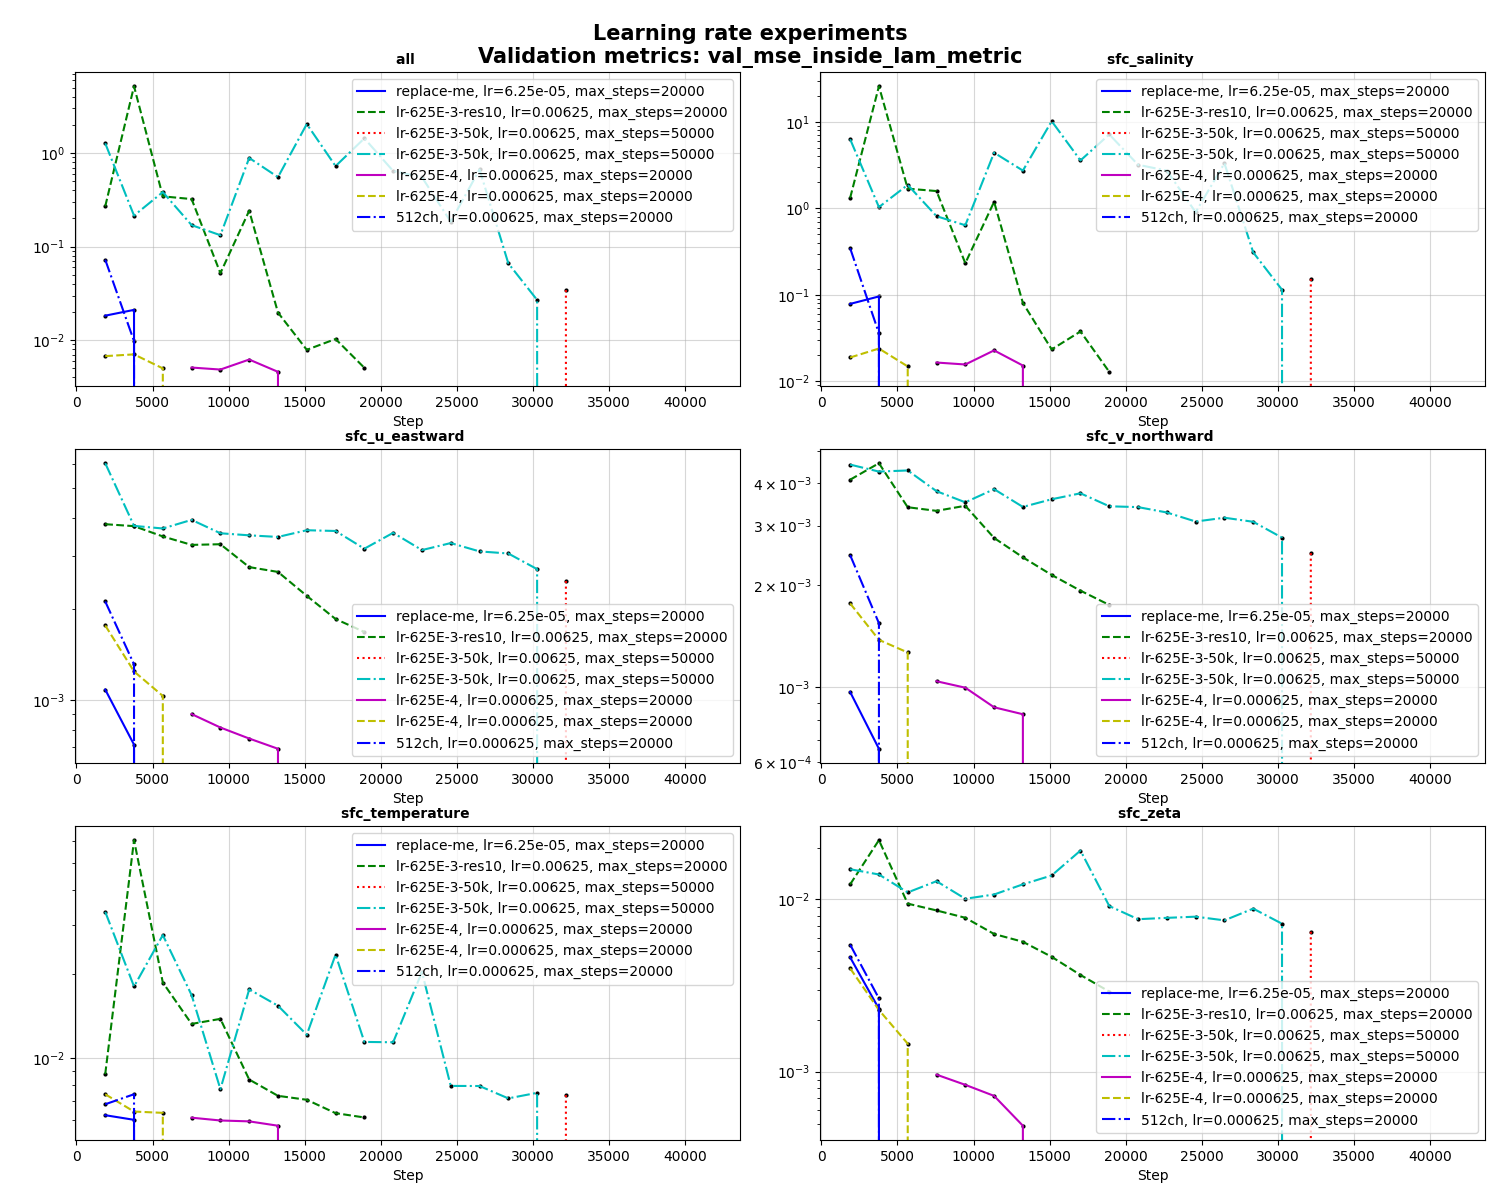

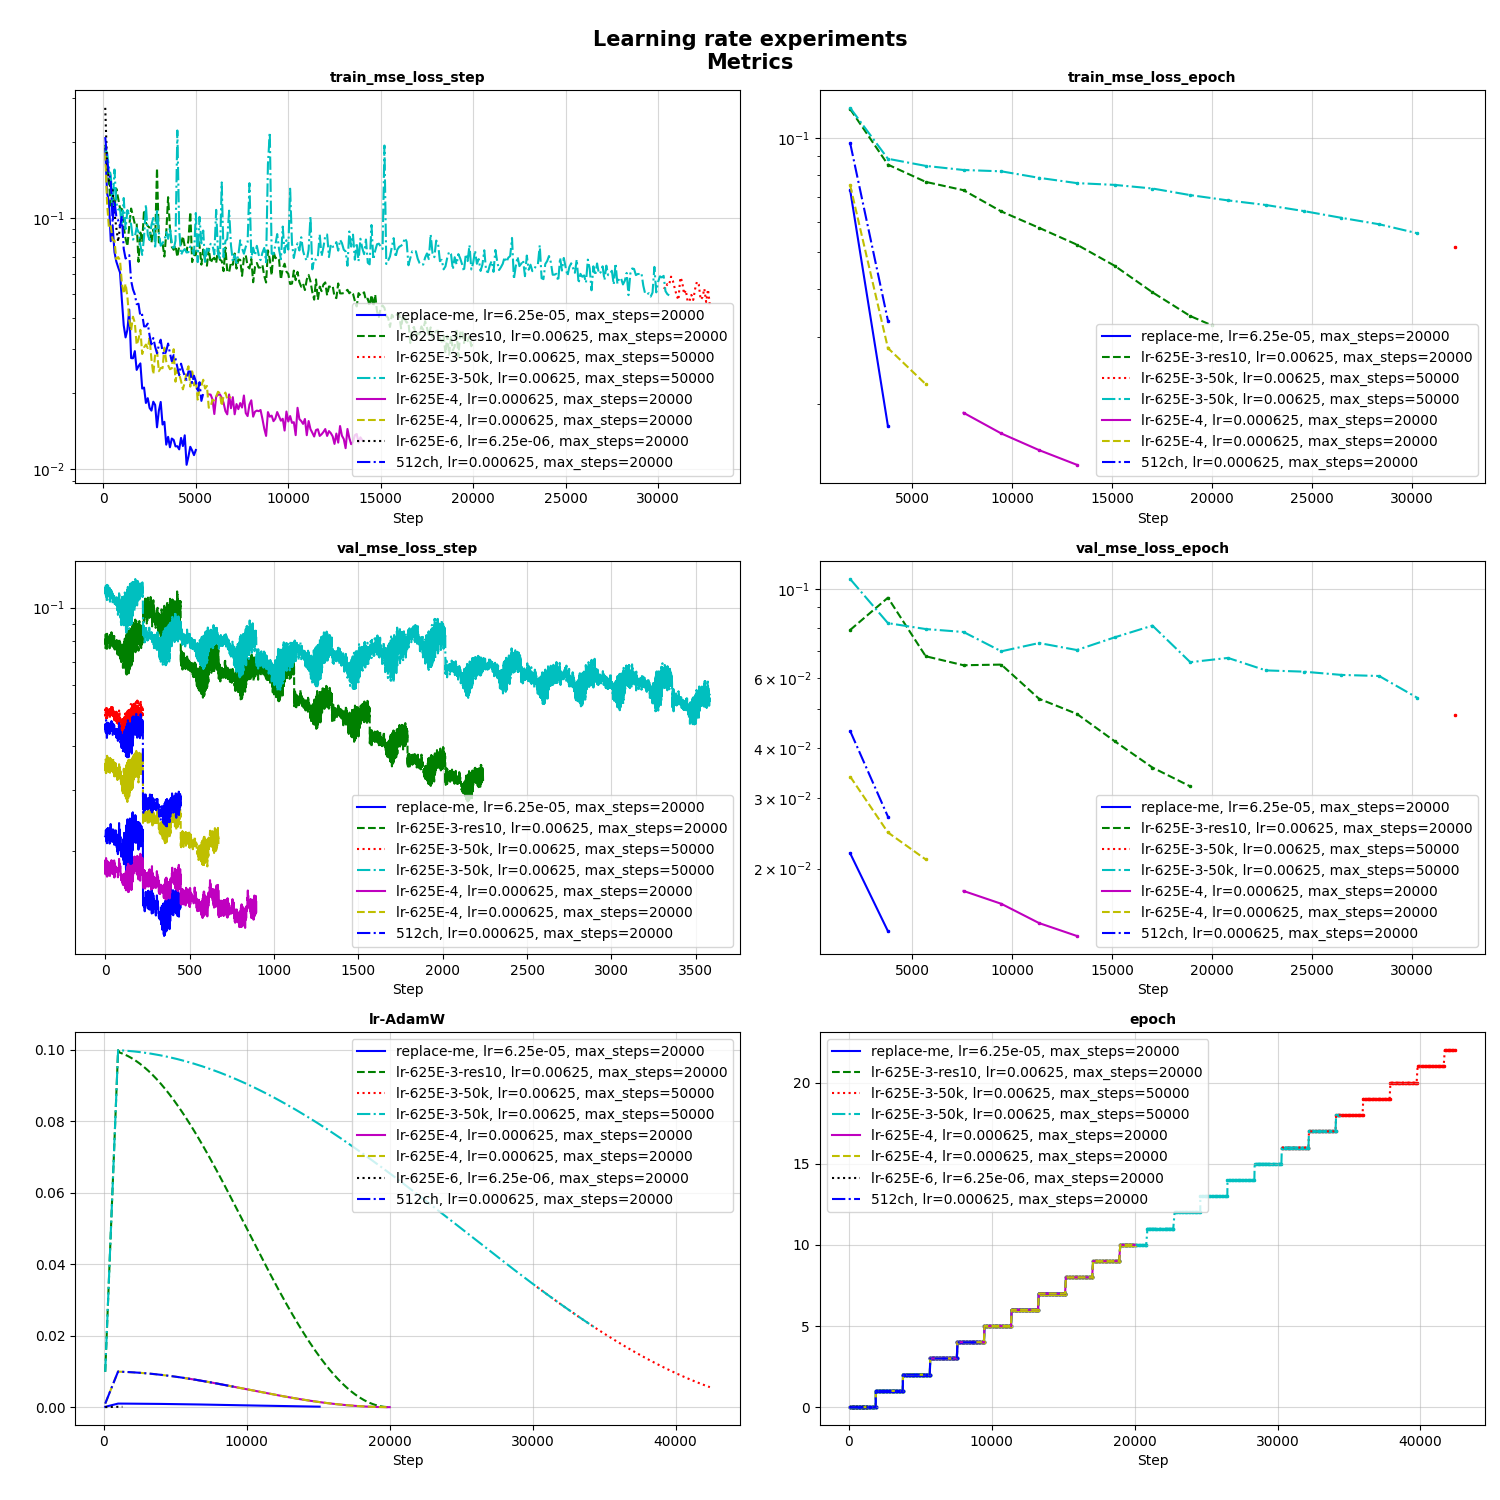

In [6]:
mlflow_multiple_dirs(mlflow_dirs_short, titles_short, suptitle='Learning rate experiments')